In [46]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# 1. Preprocessing

## 1) Tokenize

In [33]:
# Tokenize sentence
from nltk.tokenize import sent_tokenize
text= "Good muffins cost $3.88\nin New York.  I said, Please buy me two of Them.\nThanks."
sent_tokenize(text)

['Good muffins cost $3.88\nin New York.',
 'I said, Please buy me two of Them.',
 'Thanks.']

In [34]:
# Tokenize word
from nltk.tokenize import word_tokenize
"/".join(word_tokenize(text))

'Good/muffins/cost/$/3.88/in/New/York/./I/said/,/Please/buy/me/two/of/Them/./Thanks/.'

In [35]:
# Use customized Regular Expression
from nltk.tokenize import regexp_tokenize
pattern = r"""(?x)                  
             (?:[A-Z]\.)+          
             |\$?\d+(?:\.\d+)?%?
             |\w+(?:[-']\w+)*      
             |\.\.\.            
             |(?:[.,;"'?():-_`])
          """  
"/".join(regexp_tokenize(text,pattern))

'Good/muffins/cost/$3.88/in/New/York/./I/said/,/Please/buy/me/two/of/Them/./Thanks/.'

## 2) Remove stopwords

In [36]:
from nltk.corpus import stopwords
english_stopwords = stopwords.words("english")
english_stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [37]:
'/'.join([ i for i in word_tokenize(text) if i not in english_stopwords])

'Good/muffins/cost/$/3.88/New/York/./I/said/,/Please/buy/two/Them/./Thanks/.'

In [39]:
'/'.join([ i for i in word_tokenize(text) if i.lower() not in english_stopwords])

'Good/muffins/cost/$/3.88/New/York/./said/,/Please/buy/two/./Thanks/.'

## 3) Stemming/Tagging

In [42]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
'/'.join([stemmer.stem(word) for word in word_tokenize(text)])

'good/muffin/cost/$/3.88/in/new/york/./i/said/,/pleas/buy/me/two/of/them/./thank/.'

In [49]:
from nltk.tag import pos_tag
pos_tag(word_tokenize(text),tagset='universal')[:5]

[('Good', 'ADJ'),
 ('muffins', 'NOUN'),
 ('cost', 'VERB'),
 ('$', '.'),
 ('3.88', 'NUM')]

In [52]:
from collections import Counter
words_counter=Counter(word_tokenize(text))
words_counter.most_common(2)

[('.', 3), ('Please', 1)]

# 2. Feature Extraction

## 1) Document-Term Matrix (DTM)

In [57]:
import sklearn
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1,remove=('headers', 'footers', 'quotes'))

In [62]:
data_samples = dataset.data[:10]
data_samples[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
dtm_vectorizer = CountVectorizer()
dtm = dtm_vectorizer.fit_transform(data_samples)
dtm

<10x845 sparse matrix of type '<class 'numpy.int64'>'
	with 1133 stored elements in Compressed Sparse Row format>

In [72]:
print(dtm[0,]) # in document 0, word 768 appears 1 time; There is a total of 10 documents and 845 words

  (0, 768)	1
  (0, 560)	1
  (0, 314)	1
  (0, 800)	1
  (0, 618)	1
  (0, 521)	1
  (0, 755)	1
  (0, 377)	1
  (0, 342)	1
  (0, 434)	1
  (0, 90)	1
  (0, 86)	1
  (0, 128)	1
  (0, 311)	1
  (0, 322)	1
  (0, 341)	1
  (0, 683)	1
  (0, 448)	1
  (0, 316)	1
  (0, 299)	1
  (0, 633)	1
  (0, 150)	1
  (0, 681)	1
  (0, 159)	1
  (0, 192)	1
  :	:
  (0, 636)	1
  (0, 644)	1
  (0, 367)	2
  (0, 651)	1
  (0, 746)	4
  (0, 523)	1
  (0, 459)	4
  (0, 727)	5
  (0, 699)	1
  (0, 835)	1
  (0, 363)	8
  (0, 809)	1
  (0, 225)	1
  (0, 799)	2
  (0, 145)	1
  (0, 665)	2
  (0, 221)	1
  (0, 368)	2
  (0, 485)	1
  (0, 705)	1
  (0, 728)	17
  (0, 78)	1
  (0, 712)	1
  (0, 498)	3
  (0, 797)	1


In [79]:
dtm.toarray().shape # convert to array, and further analyze

(10, 845)

In [73]:
dtm_vectorizer.vocabulary_.get("sure")

712

In [76]:
dtm_vectorizer.get_feature_names()[100:105]

['any', 'anyone', 'anything', 'anyway', 'ap']

In [77]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2)) # use n-gram to take into account order
X_2 = bigram_vectorizer.fit_transform(data_samples)
X_2 # feature number increased

<10x2220 sparse matrix of type '<class 'numpy.int64'>'
	with 2567 stored elements in Compressed Sparse Row format>

## 2) TF-IDF

In [80]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [82]:
# 1 - from dfm to tfidf
tf = [[4, 0, 0],
     [3, 2, 0],
     [3, 0, 0],
     [3, 0, 2]]
tfidf = transformer.fit_transform(tf)
tfidf.toarray()

array([[1.        , 0.        , 0.        ],
       [0.61638324, 0.78744632, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.61638324, 0.        , 0.78744632]])

In [84]:
# 2 - from corpus to tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
data_samples_tfidf=vectorizer.fit_transform(data_samples)
data_samples_tfidf.toarray().shape

C:\Users\shiwa\Downloads\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(10, 845)

## 3) Word Vectors

See other notebooks

# 3. Classify

# 4. Clustering

# 5. Visualization

In [89]:
import wordcloud
cloud = wordcloud.WordCloud()
frequencies ={"text":10,"mining":25,"with":2,"python":11}
cloud.fit_words(frequencies)

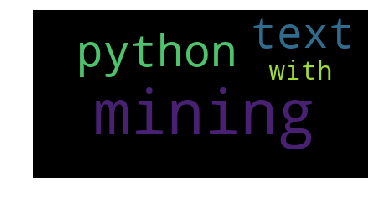

In [90]:
# word cloud from frequency
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(cloud)
plt.axis("off")
plt.show()

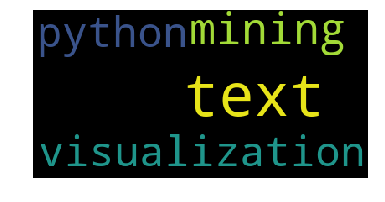

In [92]:
# word cloud from text
text="text mining with python , text visualization "
cloud.generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.show()